<a href="https://colab.research.google.com/github/JASTILATHASRI/Music-Genre-Classification/blob/main/Music_Genre_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
pip install python_speech_features

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5867 sha256=7f81748e02e9311c7634278a28f8a93983f25b6f0dc92bb7a3bbe68f83a2f12a
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io.wavfile as wav
from python_speech_features import mfcc
from tempfile import TemporaryFile
import sys
import os
import pickle
import random
sns.set_style('whitegrid')
%matplotlib inline
import librosa
import librosa, IPython
import librosa.display as lplt
import warnings
warnings.filterwarnings('ignore')
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
import tensorflow as tf
from tensorflow import keras as k
seed = 12
np.random.seed(seed)

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [ ]:
df = pd.read_csv('/content/drive/My Drive/features_3_sec.csv')
df.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  
2     2.517375   33.105122  blues  
3     3.630866   32.023678  blues  
4     0.536961   29.146694  blues  

[5 rows x 60 columns]

In [ ]:
df.shape

(9990, 60)

In [ ]:
print('Count of positive and negative samples')
df.label.value_counts().reset_index()

Count of positive and negative samples


label  count
0      blues   1000
1       jazz   1000
2      metal   1000
3        pop   1000
4     reggae   1000
5      disco    999
6  classical    998
7     hiphop    998
8       rock    998
9    country    997

In [ ]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var                  float64
mfcc6_mean                 float64
mfcc6_var                  float64
mfcc7_mean                 float64
mfcc7_var                  float64
mfcc8_mean                 float64
mfcc8_var                  float64
mfcc9_mean                 float64
mfcc9_var                  float64
mfcc10_mean                float64
mfcc10_var                 float64
mfcc11_mean                float64
mfcc11_var                 float64
mfcc12_mean                float64
mfcc12_var                 float64
mfcc13_mean                float64
mfcc13_var                 float64
mfcc14_mean                float64
mfcc14_var                 float64
mfcc15_mean                float64
mfcc15_var                 float64
mfcc16_mean                float64
mfcc16_var                 float64
mfcc17_mean                float64
mfcc17_var                 float64
mfcc18_mean                float64
mfcc18_var                 float64
mfcc19_mean                float64
mfcc19_var                 float64
mfcc20_mean                float64
mfcc20_var                 float64
label                       object
dtype: object

In [ ]:
audio_fp = '/content/drive/My Drive/genres_original/blues/blues.00000.wav'
audio_data, sr = librosa.load(audio_fp)
audio_data, _ = librosa.effects.trim(audio_data)
print(type(audio_data), type(sr),sr)

<class 'numpy.ndarray'> <class 'int'> 22050


In [ ]:
#playing the audio
IPython.display.Audio(audio_data, rate = sr)

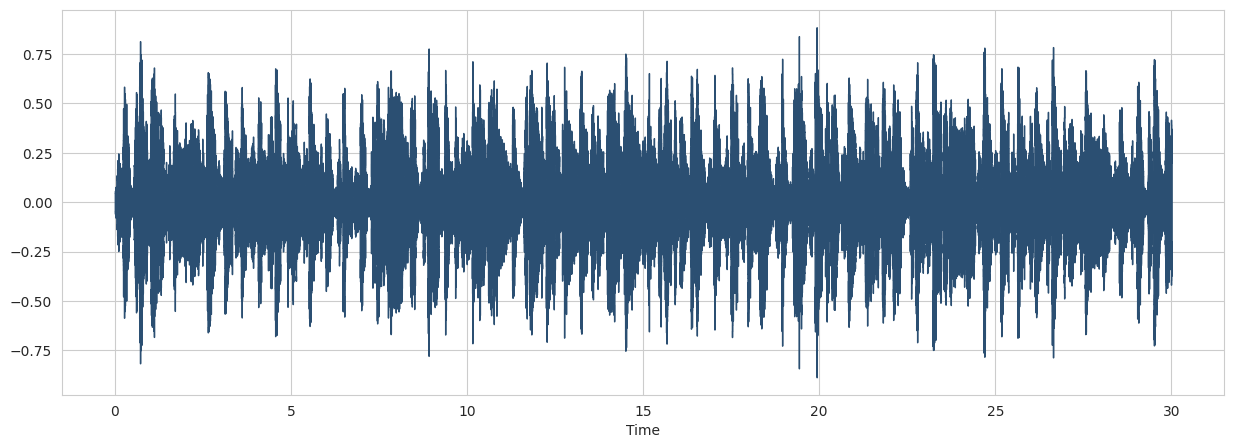

In [ ]:
#visualizing the audio files
plt.figure(figsize = (15, 5))
librosa.display.waveshow(audio_data, color = '#2B4F72')
plt.show()

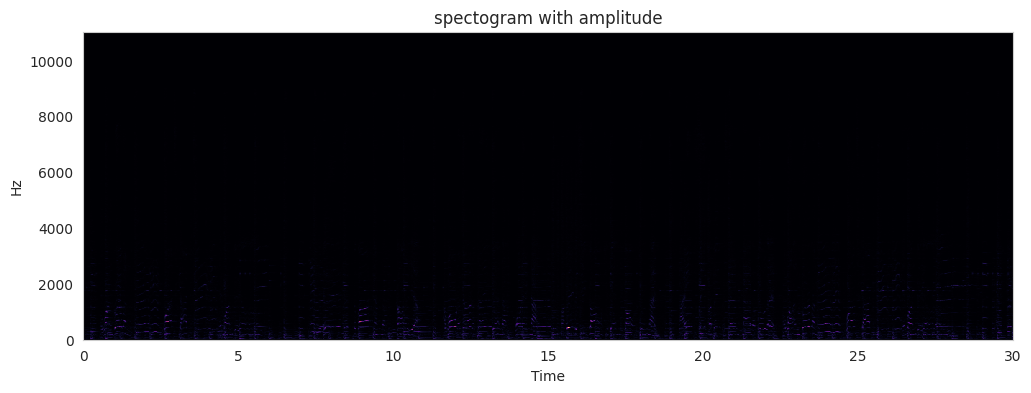

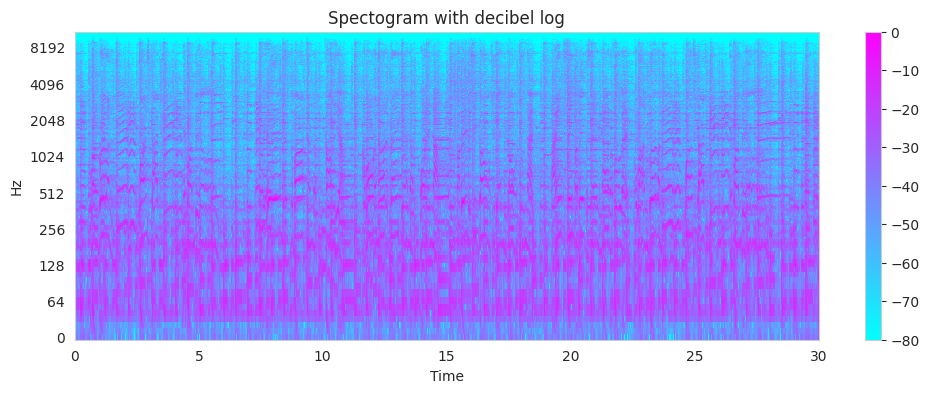

In [ ]:
#spectograms
n_fft = 2048
hop_length = 512
stft = librosa.stft(audio_data, n_fft = n_fft, hop_length = hop_length)
stft_db = librosa.amplitude_to_db(stft, ref = np.max)

plt.figure(figsize = (12, 4))
lplt.specshow(stft, sr=sr, x_axis = 'time', y_axis='hz')
plt.colorbar
plt.title("spectogram with amplitude")
plt.show()

plt.figure(figsize=(12,4))
lplt.specshow(stft_db, sr=sr, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar()
plt.title("Spectogram with decibel log")
plt.show()

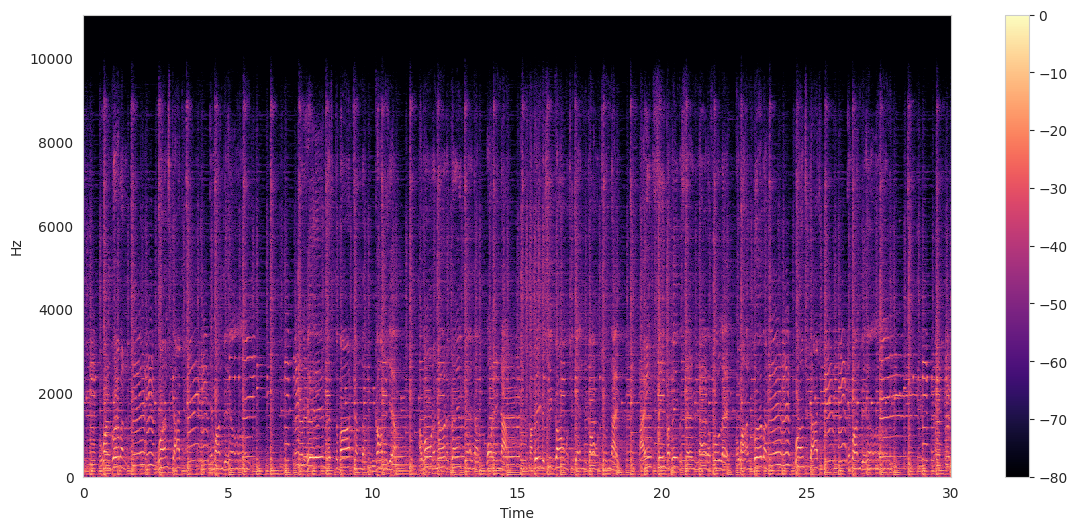

In [ ]:
stft = librosa.stft(audio_data)
plt.figure(figsize = (14, 6))
librosa.display.specshow(stft_db, sr = sr, x_axis = 'time', y_axis = 'hz')
plt.colorbar()

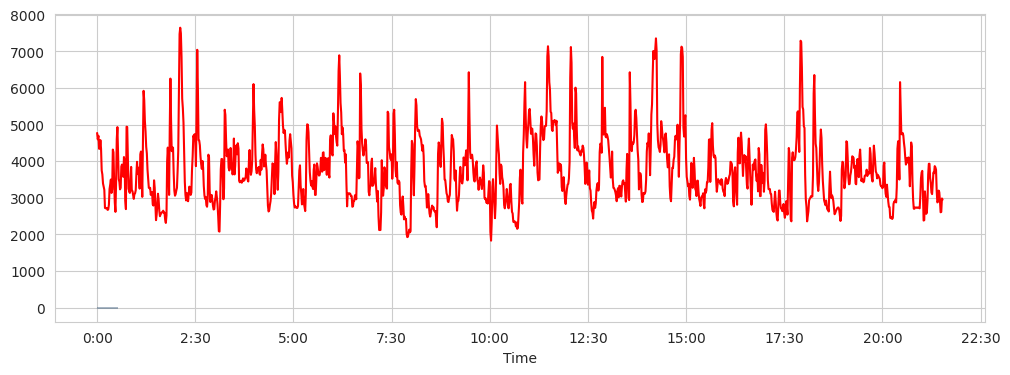

In [ ]:
#spectal rolloff
from sklearn.preprocessing import normalize
spectral_rolloff = librosa.feature.spectral_rolloff(y = audio_data+0.01, sr=sr)[0]
plt.figure(figsize = (12, 4))
librosa.display.waveshow(audio_data, sr = sr, alpha = 0.4, color = '#2B4F72')
plt.plot(spectral_rolloff, color = 'r')
plt.show()

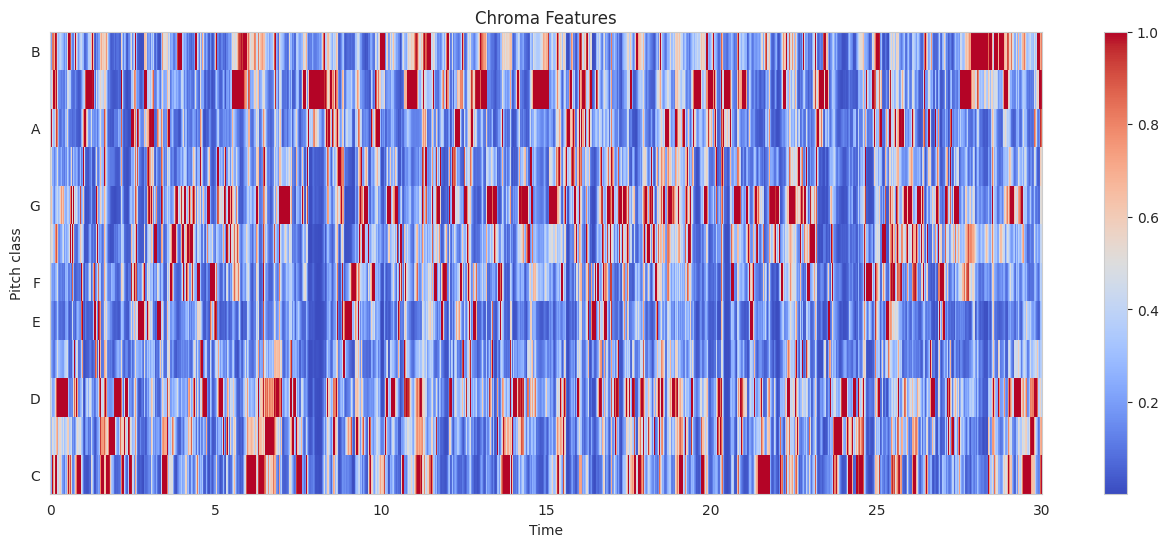

In [ ]:
#chroma feature
import librosa.display as lplt
chroma = librosa.feature.chroma_stft(y=audio_data, sr = sr)
plt.figure(figsize = (16, 6))
lplt.specshow(chroma, sr = sr, x_axis = 'time', y_axis = 'chroma', cmap = 'coolwarm')
plt.colorbar()
plt.title('Chroma Features')
plt.show()

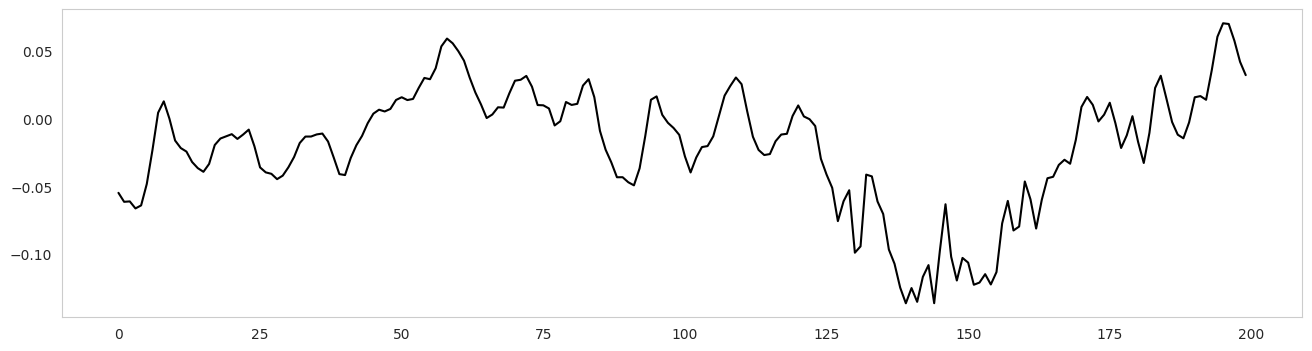

In [ ]:
#zero crossing rate
start = 1000
end = 1200
plt.figure(figsize = (16, 4))
plt.plot(audio_data[start:end], color = '#000000')
plt.grid()

In [ ]:
zero_cross_rate = librosa.zero_crossings(audio_data[start:end], pad = False)
print('The number of zero-crossings is:', sum(zero_cross_rate))

The number of zero-crossings is: 21


In [ ]:
#Data Pre-processing
print("Columns with NA values are",list(df.columns[df.isnull().any()]))

Columns with NA values are []


In [ ]:
label_index = dict()
index_label = dict()
for i, x in enumerate(df.label.unique()):
  label_index[x] = i
  index_label[i] = x
print(label_index)
print(index_label)

{'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}
{0: 'blues', 1: 'classical', 2: 'country', 3: 'disco', 4: 'hiphop', 5: 'jazz', 6: 'metal', 7: 'pop', 8: 'reggae', 9: 'rock'}


In [ ]:
df.label = [label_index.get(i,i) for i in df.label]
df.label

0       0
1       0
2       0
3       0
4       0
       ..
9985    9
9986    9
9987    9
9988    9
9989    9
Name: label, Length: 9990, dtype: int64

In [ ]:
#Split, train dev and test sets
df_shuffle = df.sample(frac = 1, random_state = seed).reset_index(drop = True)

In [ ]:
df_shuffle.drop(['filename', 'length'], axis=1, inplace=True)
df_y = df_shuffle.pop('label')
df_X = df_shuffle

X_train, df_test_valid_X, y_train, df_test_valid_y = skms.train_test_split(df_X, df_y, train_size = 0.7, random_state = seed, stratify = df_y)
X_dev, X_test, y_dev, y_test = skms.train_test_split(df_test_valid_X, df_test_valid_y, train_size = 0.66, random_state = seed, stratify = df_test_valid_y)

In [ ]:
print(f"Train set has {X_train.shape[0]} records out of {len(df_shuffle)} which is {round(X_train.shape[0]/len(df_shuffle)*100)}%")
print(f"Dev set has {X_dev.shape[0]} records out of {len(df_shuffle)} which is {round(X_dev.shape[0]/len(df_shuffle)*100)}%")
print(f"Test set has {X_test.shape[0]} records out of {len(df_shuffle)} which is {round(X_test.shape[0]/len(df_shuffle)*100)}%")

Train set has 6993 records out of 9990 which is 70%
Dev set has 1978 records out of 9990 which is 20%
Test set has 1019 records out of 9990 which is 10%


In [ ]:
print(y_train.value_counts()[0] / y_train.shape[0]*100)
print(y_dev.value_counts()[0] / y_dev.shape[0]*100)
print(y_test.value_counts()[0] / y_test.shape[0]*100)

10.01001001001001
10.010111223458038
10.009813542688912


In [ ]:
#KNN
def distance(instance1, instance2, k):
  distance = 0
  mm1 = instance1[0]
  cm1 = instance1[1]
  mm2 = instance2[0]
  cm2 = instance2[1]
  distance = np.trace(np.dot(np.linalg.inv(cm2), cm1))
  distance += (np.dot(np.dot((mm2-mm1).transpose(), np.linalg.inv(cm2)), mm2-mm1))
  distance += np.log(np.linalg.det(cm2)) - np.log(np.linalg.det(cm1))
  distance -= k
  return distance

In [ ]:
import operator
def getNeighbors(trainingset, instance, k):
  distances = []
  for x in range(len(trainingset)):
    dist = distance(trainingset[x], instance, k) + distance(instance, trainingset[x], k)
    distances.append((trainingset[x][2], dist))
  distances.sort(key = operator.itemgetter(1))
  neighbors = []
  for x in range(k):
    neighbors.append(distances[x][0])
  return neighbors

In [ ]:
def nearestclass(neighbors):
  classVote = {}
  for x in range(len(neighbors)):
    response = neighbors[x]
    if response in classVote:
      classVote[response] += 1
    else:
      classVote[response] = 1
  sorter = sorted(classVote.items(), key = operator.itemgetter(1), reverse = True)
  return sorter[0][0]

In [ ]:
def getAccuracy(testSet, prediction):
  correct = 0
  for x in range(len(testSet)):
    if testSet[x][-1] == prediction[x]:
      correct += 1
  return 1.0 * correct / len(testSet)

In [ ]:
import librosa, IPython
import librosa.display
file = '/content/drive/My Drive/genres_original/disco/disco.00000.wav'
signal, sr = librosa.load(file, sr = 22050)
IPython.display.Audio(signal, rate = sr)

In [ ]:
directory = '/content/drive/My Drive/genres_original'
f = open("my.dat", "wb")
i = 0
for folder in os.listdir(directory):
  i += 1
  if i == 11:
    break
  for file in os.listdir(directory+"/"+folder):
    try:
      (rate, sig) = wav.read(directory+"/"+folder+"/"+file)
      mfcc_feat = mfcc(sig, rate, winlen = 0.020, appendEnergy = False)
      covariance = np.cov(np.matrix.transpose(mfcc_feat))
      mean_matrix = mfcc_feat.mean(0)
      feature = (mean_matrix, covariance, i)
      pickle.dump(feature, f)
    except Exception as e:
      print("Got an exception: ",e,"in folder: ",folder, "filename: ",file)
f.close()

Got an exception:  File format b'\xcb\x15\x1e\x16' not understood. Only 'RIFF' and 'RIFX' supported. in folder:  jazz filename:  jazz.00054.wav


In [ ]:
dataset = []
def loadDataset(filename, split, trset, teset):
  with open('my.dat', 'rb') as f:
    while True:
      try:
        dataset.append(pickle.load(f))
      except EOFError:
        f.close()
        break
  for x in range(len(dataset)):
    if random.random() < split:
      trset.append(dataset[x])
    else:
      teset.append(dataset[x])
trainingSet = []
testSet = []
loadDataset('my.dat', 0.66, trainingSet, testSet)

In [ ]:
length = len(testSet)
predictions = []
for x in range(length):
  predictions.append(nearestclass(getNeighbors(trainingSet, testSet[x], 5)))
accuracy1 = getAccuracy(testSet, predictions)
print(accuracy1)

0.6827195467422096


In [ ]:
from collections import defaultdict
results = defaultdict(int)
directory = '/content/drive/My Drive/genres_original'
i = 1
for folder in os.listdir(directory):
  results[i] = folder
  i += 1

In [ ]:
pred = nearestclass(getNeighbors(dataset, feature, 5))
print(results[pred])

hiphop


In [ ]:
scaler = skp.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_dev = pd.DataFrame(scaler.transform(X_dev), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_train.columns)

In [ ]:
#building the model
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
tf.random.set_seed(seed)

In [ ]:
from keras import metrics
ACCURACY_THRESHOLD = 0.94
class myCallback(k.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > ACCURACY_THRESHOLD):
      print("\n\nStopping training as we have reached %2.2f%% accuracy!" %(ACCURACY_THRESHOLD*100))
      self.model.stop_training = True

def trainModel(model, epochs, optimizer):
  batch_size = 128
  callback = myCallback()
  model.compile(optimizer = optimizer,
                loss = tf.keras.losses.sparse_categorical_crossentropy,
                metrics = ['accuracy']
                )
  return model.fit(X_train, y_train, validation_data = (X_dev, y_dev), epochs = epochs,
                   batch_size = batch_size, callbacks = [callback])
def plotHistory(history):
  print("Max validation Accuracy", max(history.history["val_accuracy"]))
  pd.DataFrame(history.history).plot(figsize = (12, 6))
  plt.show()

In [ ]:
model_1 = k.models.Sequential([
      k.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
      k.layers.Dense(128, activation='relu'),
      k.layers.Dense(64, activation='relu'),
      k.layers.Dense(10, activation='softmax'),
])
print(model_1.summary())

#def my_custom_func():
    # your code
#    return
#from keras.models import load_model
#model = load_model('my_model.h5', custom_objects={'my_custom_func': my_custom_func})

model_1_history = trainModel(model=model_1, epochs=70, optimizer='adam')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │          14,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,650 (221.29 KB)

 Trainable params: 56,650 (221.29 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/70
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.3843 - loss: 1.7508 - val_accuracy: 0.6259 - val_loss: 1.0506
Epoch 2/70
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6764 - loss: 0.9541 - val_accuracy: 0.7118 - val_loss: 0.8302
Epoch 3/70
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7546 - loss: 0.7413 - val_accuracy: 0.7528 - val_loss: 0.7121
Epoch 4/70
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7952 - loss: 0.6185 - val_accuracy: 0.7887 - val_loss: 0.6318
Epoch 5/70
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8265 - loss: 0.5239 - val_accuracy: 0.8064 - val_loss: 0.5766
Epoch 6/70
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8532 - loss: 0.4460 - val_accuracy: 0.8170 - val_loss: 0.5461
Epoch 7/70
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8782 - loss: 0.3815 - val_accuracy: 0.8225 - val_loss: 0.5237
Epoch 8/70
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9001 - loss: 0.3241 - val_accuracy: 0.8276 - va

Max validation Accuracy 0.8948432803153992


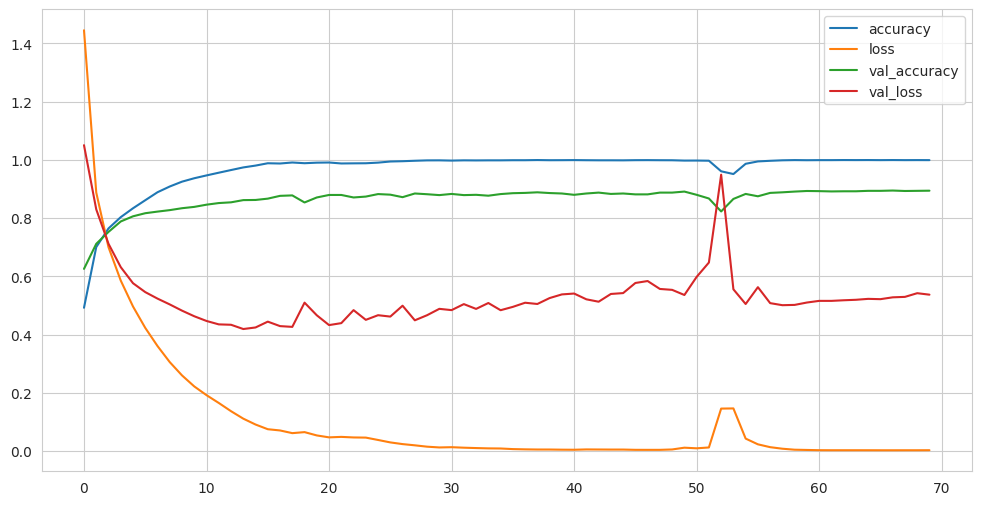

In [ ]:
plotHistory(model_1_history)

In [ ]:
model_2 = k.models.Sequential([
    k.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.2),

    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(10, activation='softmax'),
])
print(model_2.summary())
model_2_history = trainModel(model=model_1, epochs=100, optimizer='adam')

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 512)                 │          29,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 202,826 (792.29 KB)

 Trainable params: 202,826 (792.29 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9978 - loss: 0.0115 - val_accuracy: 0.8842 - val_loss: 0.6227
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9952 - loss: 0.0147 - val_accuracy: 0.8766 - val_loss: 0.6406
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9936 - loss: 0.0194 - val_accuracy: 0.8847 - val_loss: 0.6482
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9905 - loss: 0.0311 - val_accuracy: 0.8584 - val_loss: 0.7505
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9901 - loss: 0.0282 - val_accuracy: 0.8862 - val_loss: 0.6100
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9973 - loss: 0.0090 - val_accuracy: 0.8857 - val_loss: 0.6082
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9972 - loss: 0.0089 - val_accuracy: 0.8918 - val_loss: 0.5790
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9989 - loss: 0.0043 - val_accuracy: 0.891

Max validation Accuracy 0.9019211530685425


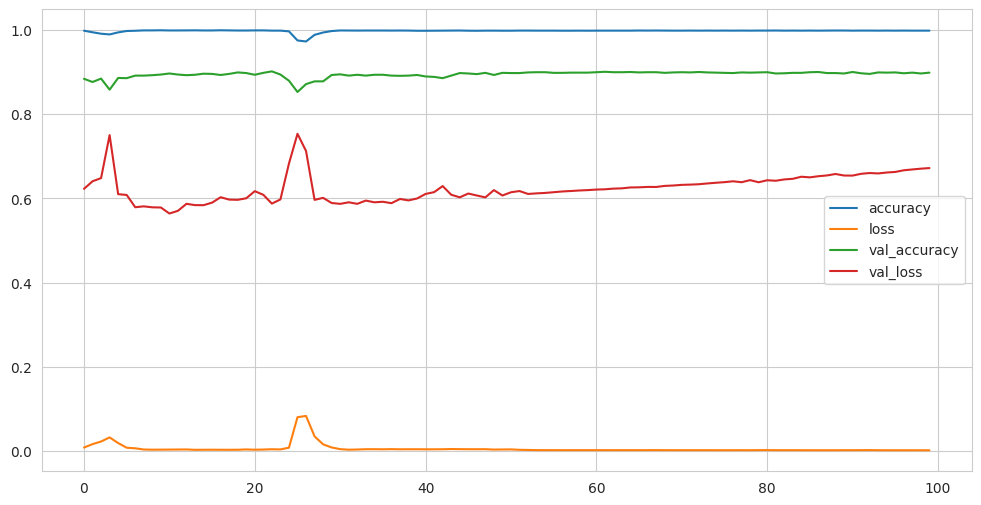

In [ ]:
plotHistory(model_2_history)

In [ ]:
test_loss, knn_test_acc = model_1.evaluate(X_test, y_test, batch_size = 128)
print('The test loss is:', test_loss)
print('\nThe best test Accuracy is:', knn_test_acc*100)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8970 - loss: 0.6581 
The test loss is: 0.7105967998504639

The best test Accuracy is: 89.401376247406


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape (Reshape)                    │ (None, 57, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 55, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 27, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 25, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 12, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 768)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 106,058 (414.29 KB)

 Trainable params: 106,058 (414.29 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/70
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.3309 - loss: 1.9342 - val_accuracy: 0.5470 - val_loss: 1.3125
Epoch 2/70
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5918 - loss: 1.2080 - val_accuracy: 0.6330 - val_loss: 1.0878
Epoch 3/70
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6558 - loss: 1.0159 - val_accuracy: 0.6663 - val_loss: 0.9683
Epoch 4/70
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.6914 - loss: 0.8977 - val_accuracy: 0.6891 - val_loss: 0.8877
Epoch 5/70
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7204 - loss: 0.8091 - val_accuracy: 0.7113 - val_loss: 0.8203
Epoch 6/70
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7490 - loss: 0.7309 - val_accuracy: 0.7265 - val_loss: 0.7671
Epoch 7/70
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7755 - loss: 0.6623 - val_accuracy: 0.7513 - val_loss: 0.7234
Epoch 8/70
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7952 - loss: 0.6039 - val_accuracy: 0.763

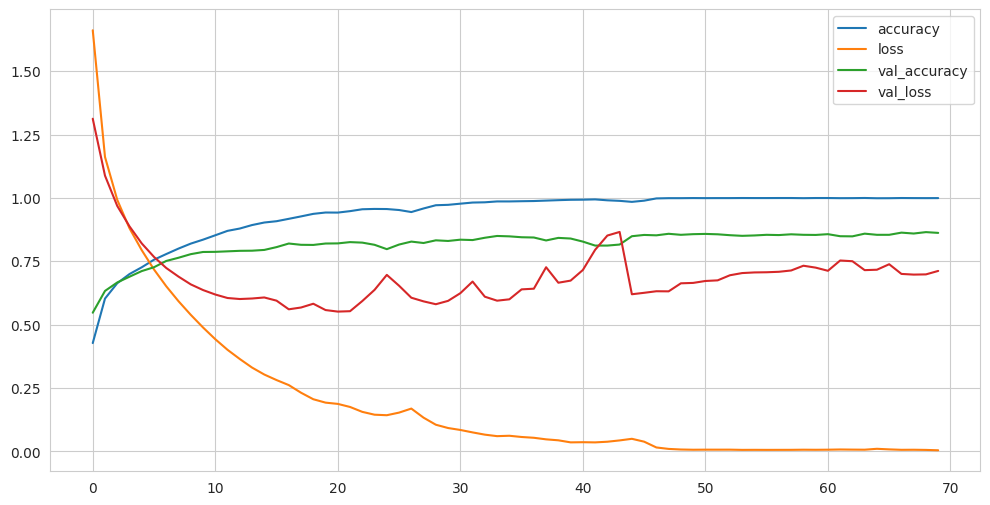

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8756 - loss: 0.7157
The test loss is: 0.7027850151062012

The best test Accuracy is: 87.53679990768433


In [ ]:
#CNN

model_cnn = k.models.Sequential([
    k.layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
    k.layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
    k.layers.MaxPooling1D(pool_size=2),
    k.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    k.layers.MaxPooling1D(pool_size=2),
    k.layers.Flatten(),
    k.layers.Dense(128, activation='relu'),
    k.layers.Dense(10, activation='softmax')
])

print(model_cnn.summary())

model_cnn_history = trainModel(model=model_cnn, epochs=70, optimizer='adam')
plotHistory(model_cnn_history)

test_loss, cnn_test_acc = model_cnn.evaluate(X_test, y_test, batch_size=128)
print('The test loss is:', test_loss)
print('\nThe best test Accuracy is:', cnn_test_acc * 100)


In [ ]:
# SVM

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM classifier
svm_model = SVC(kernel='linear', C=1)  # You can experiment with different kernels and C values

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
svm_test_acc = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", svm_test_acc)


SVM Accuracy: 0.7644749754661433


In [ ]:
print("SVM Accuracy:", svm_test_acc)
print("CNN Accuracy:", cnn_test_acc)
print("KNN Accuracy:", knn_test_acc)

SVM Accuracy: 0.7644749754661433
CNN Accuracy: 0.8753679990768433
KNN Accuracy: 0.8940137624740601


In [1]:
%cd /content/Music-Genre-Classification
!git init
!git add .
!git commit -m "Initial commit from Colab"
!git branch -M main
!git remote add origin https://github.com/JASTILATHASRI/Music-Genre-Classification.git
!git push -u origin main


[Errno 2] No such file or directory: '/content/Music-Genre-Classification'
/content
hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/
Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@2ae6467ed84c.(none)')
error: src refspec main does not match any
er